In [30]:
# Emily Walla, Stephanie Juneau, Madison Walder
# May 8 2020

# make necessary imports

import numpy as np

import matplotlib.pyplot as plt

from   astropy.io import fits
import astropy.units as u

#mpdaf used to manipulate the MUSE datacube
from mpdaf.obj import Cube, WCS, WaveCoord, Image
from mpdaf.drs import PixTable

# necessary to make matplotlib function well in the jupyter environment
%matplotlib inline

# Spectral Extractions of Apertures
## Step 1. Aperture Extraction
#### the subcubeimg function creates a subcube of an aperture that you specify

##### parameters:

    file_cube: format: string; what is returned from the whiteimg func above, the cube of your fits file.
    
    center: format: float(x,y); the x and y coordinates of the center of your aperture.
    
    diameter : format: float; the diameter of your aperture.
    
    units: format: astropy.u.<unit>; the units of your input coordinates and diameter.
    
    label: format: "string"; what you want your plot to be titled
    
    shape: format: <0, 1, 2>; 0 will return a circular aperture, 1 will return a square aperture, and 2 will return both.  the default is shape = 2.

In [360]:
def subcubeimg(file_cube_name, center, diameter, units, label, shape=2):
    file_cube = Cube(file_cube_name)
    
    
    if shape==0:
        #makes a circular aperture
        subcube = file_cube.subcube_circle_aperture(center=center, radius=(diameter*0.5), unit_center=units, unit_radius=units)
        subcubeImg = subcube.sum(axis=0)

        return subcube, subcubeImg
        
    elif shape==1:
        # makes a square aperture
        subcube = file_cube.subcube(center=center, size=diameter, unit_center=units, unit_size=units)
        subcubeImg = subcube.sum(axis=0)
     
        
        return subcube, subcubeImg
        
    elif shape==2:
        subcube_circ = file_cube.subcube_circle_aperture(center=center, radius=(diameter*0.5), unit_center=units, unit_radius=units)
        subcube_squa =  file_cube.subcube(center=center, size=diameter, unit_center=units, unit_size=units)
        squaImg = subcube_squa.sum(axis=0)
        circImg = subcube_circ.sum(axis=0)
        
        return subcube_circ, subcube_squa
    

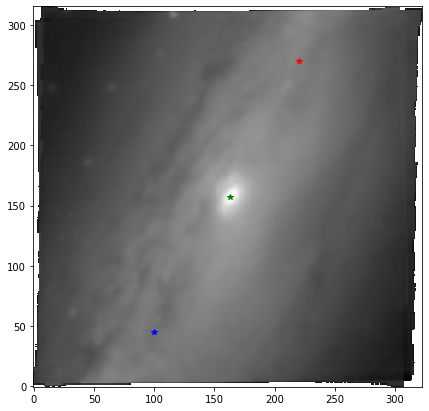

In [361]:
file_cube_name =  "/home/jail/dlusers/ewalla02/MUSE/Juneau/ADP.2016-07-12T07:36:55.307.fits"
label = "ESO-reduced cube"

jeso_subcube_center,center_img = subcubeimg(file_cube_name,(163,157),5, label=label,shape=1,units=None)
jeso_subcube_right,right_img = subcubeimg(file_cube_name,(220,270),5, label = label+" right",shape=1,units=None)
jeso_subcube_left,left_img = subcubeimg(file_cube_name,(100,45),5,label = label+" left",shape=1,units=None)


# I plot the location of the extracted subcubes on the full whitelight image for context
cube = Cube(file_cube_name)
whiteimg = cube.sum(axis=0)

plt.figure(figsize=(7,7))

whiteimg.plot(cmap="gray",scale="log")
plt.plot(163,157,"g*")
plt.plot(220,270,"r*")
plt.plot(100,45,"b*")

plt.show()


# Spectral Extractions of Apertures
## Step 2. Spectra Extraction
#### the spectrualExtraction function extracts spectra from a specified wavelength range

##### parameters:

    file_cube: format: string; what is returned from the subcube func above, the cube of your fits file.
    
    label: format: string; what you want your extraction to be labeled as when it is plotted
    
    full : format: True/False; default: False. Indicates if the full spectrum of the cube is extracted (True) or only a specified wavelength range (False).
    
    lmin: format: int or float; default: 4500. The minimum wavelength of your range, in angstroms.
    
    lmax: format: int or float; default: 9500. The maximum wavelength of your range, in angstroms.

In [275]:
def spectralExtraction(file_cube, label, full=False, lmin=4500, lmax=9500):
    if full == True:
        # returns the entire summed spectrum, over the entire wavelength range
        fullSpec = file_cube.sum(axis=(1,2))
        
        plt.figure(figsize=(14,7))
        fullSpec.plot()
        plt.title(label)
        plt.show()
        
        return fullSpec
        
    else:
        # returns the summed spectrum of the given wavelength range
        
        l1,l2 = file_cube.sum(axis=(1,2)).wave.pixel([lmin,lmax], nearest=True)
        spec = (file_cube[l1:l2+1,:,:].sum(axis=(1,2)))
    
        plt.figure(figsize=(14,7))
        spec.plot()
        plt.title(label)
        plt.show()
    
        return spec

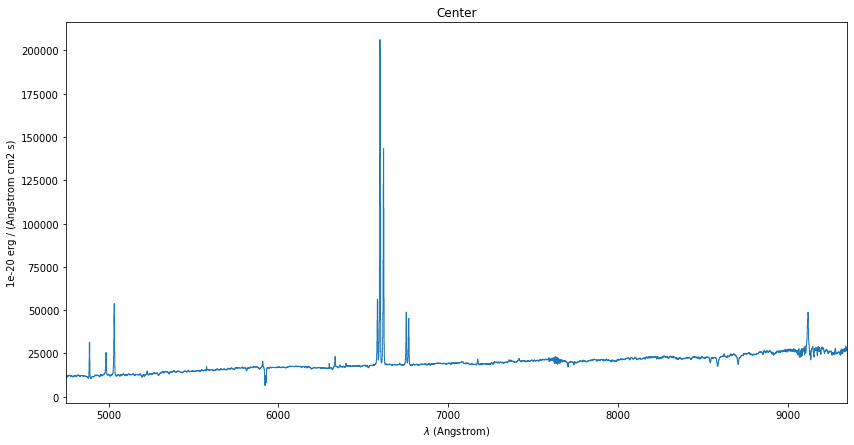

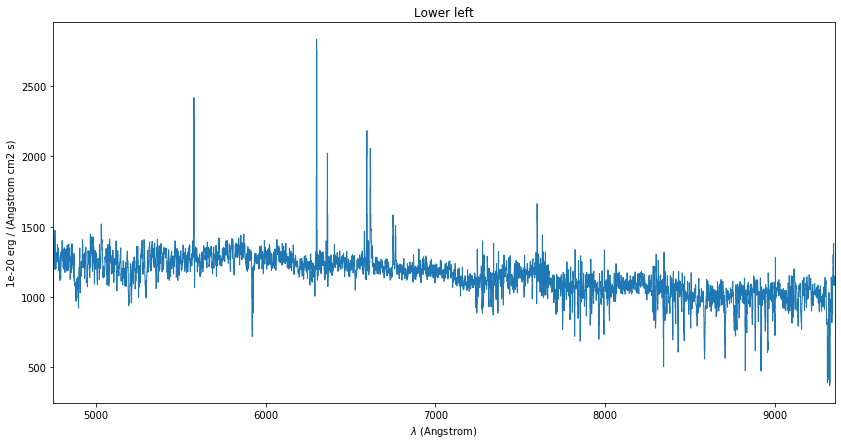

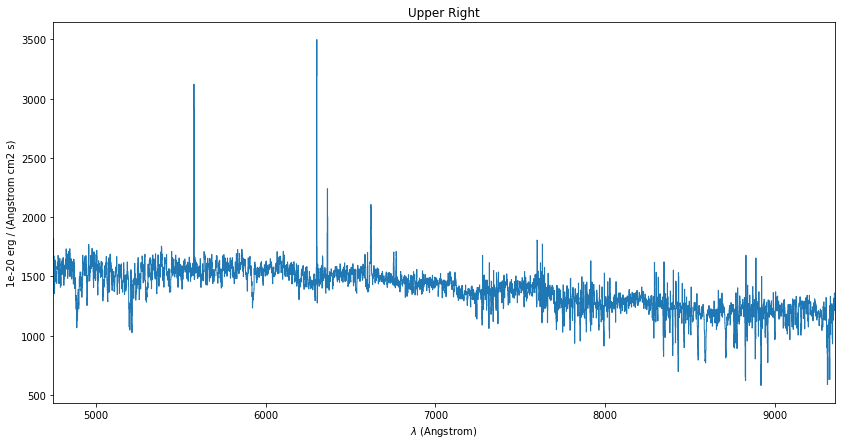

In [323]:
center_spec = spectralExtraction(jeso_subcube_center,full=True, label="Center")
left_spec = spectralExtraction(jeso_subcube_left,full=True, label="Lower left")
right_spec = spectralExtraction(jeso_subcube_right,full=True, label="Upper Right")
center_specdat= (center_spec.data)/8
left_specdat = left_spec.data
right_specdat = right_spec.data

wavelength = np.arange(4750.1083984,9352.6083984 ,1.25)

#### The Emission/absorption line plotting zone

Here we plot the spectra all on one plot, with important emission and absorption features marked. The last cell plots in specific regions to better view the emission features.

In [401]:
redshift = .005264
#wavelength = wavelength*(1+redshift)
#Common Emission (or emission+absorption) Lines Lines
halpha = 6562.8
hbeta = 4861.33
o3 = 5007
o34959 = 4959
mg = 5167.321
he = 4400
sky = 5577
FeII = 5710.6218
NiII = 5756.108
CIV= 5781.1
C1 = 5782.32
Ni = 6498.24
SII = 6717
Sii = 6731

NII6548 = 6548.03
NII6584 = 6584
HeII = 4685.74
NI = 5200.39
OI = 6300.20
Oi = 6363
ArIII = 7135.67


#Common Absorption Lines
na1 = 5890.00
na2 = 5896.00
ca1 =  8498.03
ca2 = 8542.09
ca3 =  8662.14

absarray = [ hbeta, o3,             o34959, halpha, na1,  na2,    OI,   Oi,                   SII,             Sii,   ArIII,    ca1, ca2,  ca3,            NII6583, NII6549]
absnames = ["Hβ","[OIII] λ4959, 5007",None, None,   None,"Na D",  None,"[OI] λ6300, 6363", "[SII] λ6717, 6731",None,"[ArIII]",None, None,"[CaII] Triplet ","[NII]λ6548, Hα, [NII]λ6584",None]
red_absarray = np.zeros_like(absarray)
for j in range(len(absarray)):
    red_absarray[j]=(absarray[j]*(redshift+1))
print("red-shifted lines:", red_absarray)


red-shifted lines: [4886.92004112 5033.356848   4985.104176   6597.3465792  5921.00496
 5927.036544   6333.3642528  6396.494832   6752.358288   6766.431984
 7173.23216688 8542.76362992 8587.05556176 8707.73750496 6618.06507024
 6582.49882992]


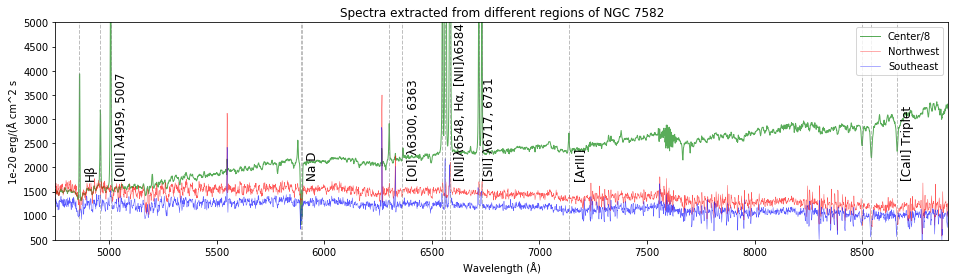

In [403]:
wavelength = np.arange(4750.1083984,9352.6083984 ,1.25)
wavelength = wavelength/(1+redshift)


plt.figure(figsize=(16,4))


plt.plot(wavelength,center_specdat,color="green",linewidth=1,alpha=.65, label="Center/8")
plt.plot(wavelength,right_specdat,color="red",linewidth=.5,alpha=.65,label="Northwest")
plt.plot(wavelength,left_specdat,color="blue",linewidth=.5,alpha=.65,label="Southeast")

for j in range(0,16):
    plt.axvline(absarray[j],linewidth=1, alpha=.5,color="gray",linestyle="dashed")
    plt.text(absarray[j]+20,1800,s=absnames[j],rotation=90,fontsize=12)

plt.ylim(500,5000)
plt.xlim(4750,8900)



plt.title("Spectra extracted from different regions of NGC 7582")
plt.legend()
plt.xlabel("Wavelength (Å)")
plt.ylabel("1e-20 erg/(Å cm^2 s")

plt.show()

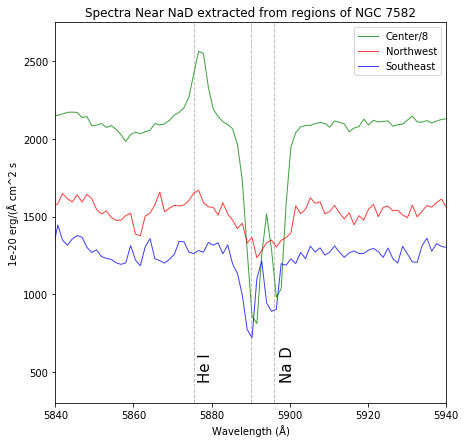

In [409]:
wavelength = np.arange(4750.1083984,9352.6083984 ,1.25)
wavelength = wavelength/(1+redshift)


plt.figure(figsize=(7,7))


plt.plot(wavelength,center_specdat,color="green",linewidth=1,alpha=.75, label="Center/8")
plt.plot(wavelength,right_specdat,color="red",linewidth=1.0,alpha=.75,label="Northwest")
plt.plot(wavelength,left_specdat,color="blue",linewidth=1.0,alpha=.75,label="Southeast")

plt.axvline(5875.6,linewidth=1, alpha=.5, color="gray",linestyle="dashed")
plt.text(5875.6+1,450,s="He I",rotation=90,fontsize=15)
plt.axvline(5890,linewidth=1, alpha=.5, color="gray",linestyle="dashed")
plt.axvline(5896,linewidth=1, alpha=.5, color="gray",linestyle="dashed")
plt.text(5896.6+1,450,s="Na D",rotation=90,fontsize=15)
plt.ylim(300,2750)
plt.xlim(5840,5940)



plt.title("Spectra Near NaD extracted from regions of NGC 7582")
plt.legend()
plt.xlabel("Wavelength (Å)")
plt.ylabel("1e-20 erg/(Å cm^2 s")
plt.show()